In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('/content/Walmart DataSet.csv')

In [8]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [13]:
data.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [21]:
# Step 1: Calculate average Weekly Sales per Unemployment rate for each store
store_unemployment = data.groupby(['Store', 'Unemployment'])['Weekly_Sales'].mean().reset_index()
store_unemployment

,Store,Unemployment,Weekly_Sales
0,1,6.573,1.561397e+06
1,1,6.908,1.557996e+06
2,1,7.143,1.613751e+06
3,1,7.348,1.594136e+06
4,1,7.682,1.539425e+06
...,...,...,...
535,45,8.684,7.370206e+05
536,45,8.724,8.869910e+05
537,45,8.743,7.344840e+05
538,45,8.899,7.953325e+05


In [25]:
# Step 2: Sort the data by Unemployment and Weekly Sales
store_impact = store_unemployment.sort_values(by=['Unemployment', 'Weekly_Sales'], ascending=[True, True])
store_impact

,Store,Unemployment,Weekly_Sales
36,4,3.879,2.147431e+06
37,4,4.077,2.138215e+06
468,40,4.125,9.790567e+05
264,23,4.125,1.422222e+06
469,40,4.145,9.727676e+05
...,...,...,...
142,12,14.180,9.361771e+05
334,28,14.180,1.268618e+06
455,38,14.313,3.482393e+05
143,12,14.313,1.068569e+06


In [28]:
# Step 3: Calculate the difference between max and min sales for each store
store_impact_summary = store_impact.groupby('Store')['Weekly_Sales'].agg(['max', 'min']).reset_index()
store_impact_summary['Impact'] = store_impact_summary['max'] - store_impact_summary['min']
store_impact_summary

,Store,max,min,Impact
0,1,1.689992e+06,1.473095e+06,216897.336923
1,2,2.119563e+06,1.775147e+06,344415.190000
2,3,4.456093e+05,3.598028e+05,85806.484615
3,4,2.421418e+06,1.881306e+06,540111.644615
4,5,3.554703e+05,2.918033e+05,63667.026154
5,6,1.723750e+06,1.443543e+06,280206.965128
6,7,6.588413e+05,4.522095e+05,206631.746923
7,8,1.003883e+06,8.446748e+05,159207.996154
8,9,6.263589e+05,4.878977e+05,138461.182308
9,10,2.175547e+06,1.738011e+06,437536.186154


In [30]:
# Step 4: Sort by impact to find the most affected stores
most_affected_stores = store_impact_summary.sort_values(by='Impact', ascending=False)
most_affected_stores

,Store,max,min,Impact
13,14,2.280426e+06,1.629812e+06,650614.138736
3,4,2.421418e+06,1.881306e+06,540111.644615
12,13,2.288295e+06,1.822177e+06,466118.244359
22,23,1.631284e+06,1.167900e+06,463383.889038
38,39,1.701865e+06,1.242916e+06,458948.206827
9,10,2.175547e+06,1.738011e+06,437536.186154
34,35,1.164555e+06,7.417584e+05,422796.812308
40,41,1.447741e+06,1.039439e+06,408302.013269
19,20,2.396334e+06,1.993432e+06,402901.800641
26,27,1.935892e+06,1.561001e+06,374891.393681


In [33]:
# Display the top 5 most affected stores
print("Top 5 Most Affected Stores by Unemployment:")
print(most_affected_stores.head())

Top 5 Most Affected Stores by Unemployment:
    Store           max           min         Impact
13     14  2.280426e+06  1.629812e+06  650614.138736
3       4  2.421418e+06  1.881306e+06  540111.644615
12     13  2.288295e+06  1.822177e+06  466118.244359
22     23  1.631284e+06  1.167900e+06  463383.889038
38     39  1.701865e+06  1.242916e+06  458948.206827


<ipython-input-37-c7644b738def>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_affected_stores.head(10), x='Store', y='Impact', palette='viridis')


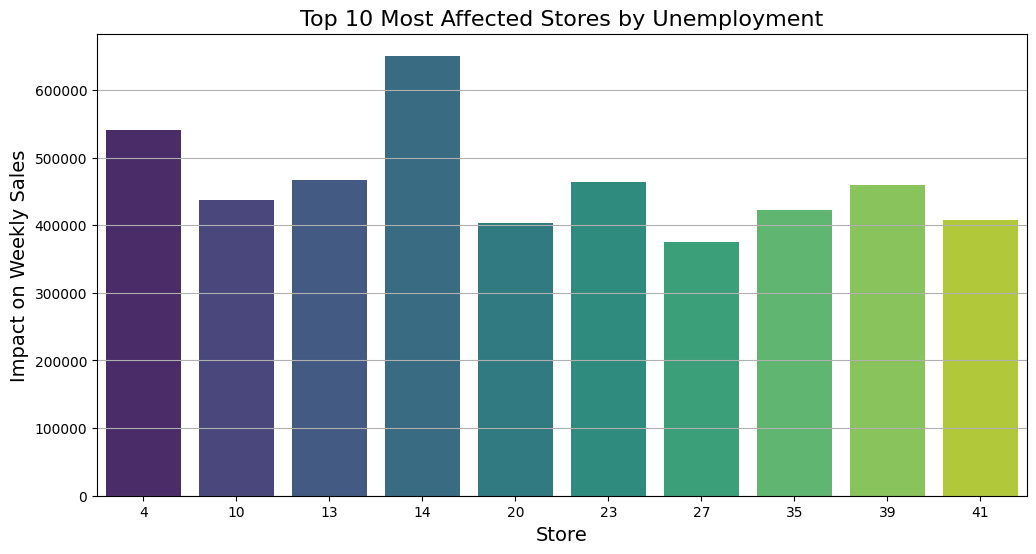

In [37]:
# Optional: Visualization of Impact
plt.figure(figsize=(12, 6))
sns.barplot(data=most_affected_stores.head(10), x='Store', y='Impact', palette='viridis')
plt.title('Top 10 Most Affected Stores by Unemployment', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Impact on Weekly Sales', fontsize=14)
plt.grid(axis='y')
plt.show()

In [48]:
# Step 1: Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Step 2: Group by Date to get weekly sales data (if not already in weekly format)
weekly_sales = data.groupby(['Date'])['Weekly_Sales'].sum().reset_index()

# Step 3: Set the 'Date' column as the index for time series analysis
weekly_sales.set_index('Date', inplace=True)

# Step 4: Perform Seasonal Decomposition using statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition with a period of 52 (for weekly data)
decomposition = seasonal_decompose(weekly_sales['Weekly_Sales'], model='multiplicative', period=52)
decomposition


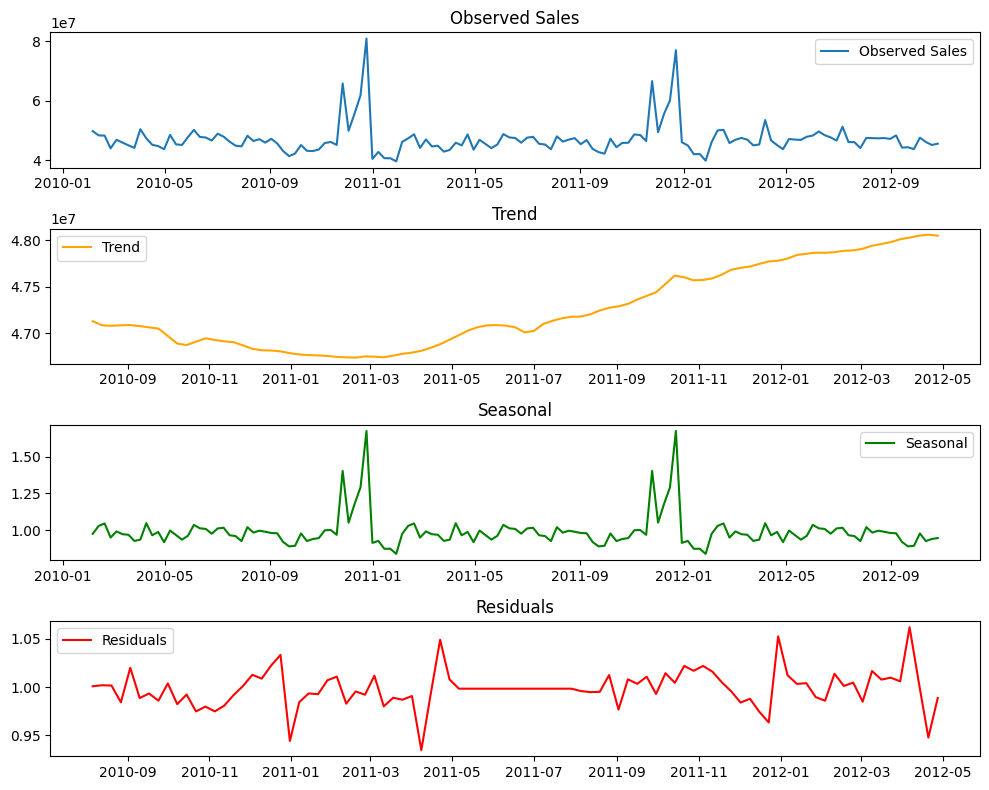

In [50]:
# Step 5: Plot the decomposition results
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed Sales')
plt.legend(loc='best')
plt.title('Observed Sales')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='best')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [52]:
# Step 6: Analyze the seasonal pattern and its potential reasons
seasonal_pattern = decomposition.seasonal
print("Seasonal pattern analysis:")
print(seasonal_pattern.describe())


Seasonal pattern analysis:
count    143.000000
mean       0.992950
std        0.114380
min        0.840927
25%        0.937382
50%        0.976643
75%        1.009755
max        1.673120
Name: seasonal, dtype: float64


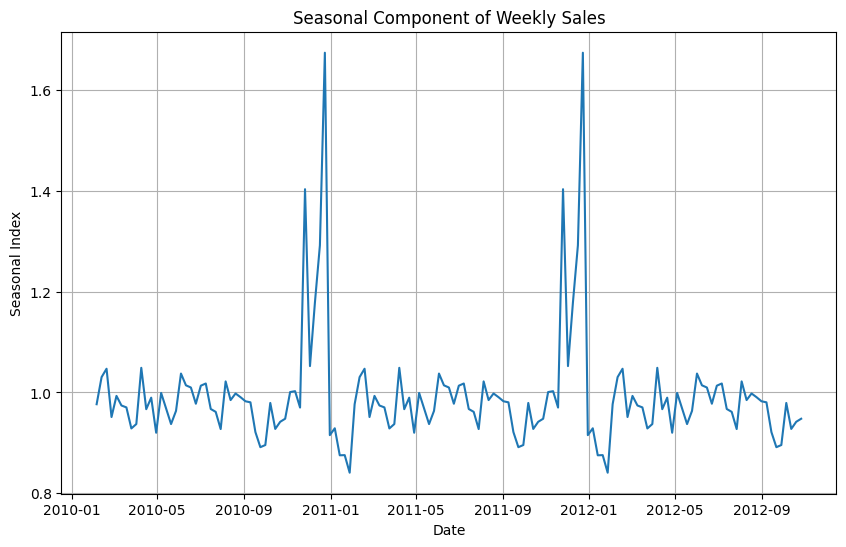

In [54]:
# Optional: Visualize seasonal pattern to detect periodic trends
plt.figure(figsize=(10, 6))
plt.plot(seasonal_pattern)
plt.title('Seasonal Component of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Seasonal Index')
plt.grid(True)
plt.show()

In [56]:
# Step 1: Check the correlation between Temperature and Weekly Sales
correlation = data[['Temperature', 'Weekly_Sales']].corr()
print("Correlation between Temperature and Weekly Sales:")
print(correlation)

Correlation between Temperature and Weekly Sales:
              Temperature  Weekly_Sales
Temperature       1.00000      -0.06381
Weekly_Sales     -0.06381       1.00000


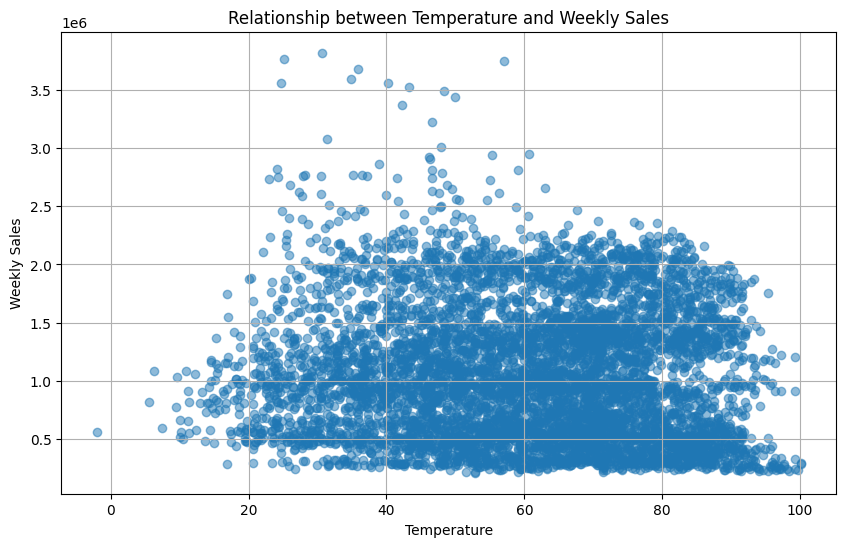

In [58]:
# Step 2: Scatter plot to visualize the relationship between Temperature and Weekly Sales
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Weekly_Sales'], alpha=0.5)
plt.title('Relationship between Temperature and Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [60]:
# Step 3: Linear Regression Analysis to predict Weekly Sales based on Temperature
from sklearn.linear_model import LinearRegression

In [62]:
# Reshape temperature data for regression model
X = data['Temperature'].values.reshape(-1, 1)
y = data['Weekly_Sales'].values

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [64]:
# Predict the weekly sales based on temperature
predicted_sales = model.predict(X)

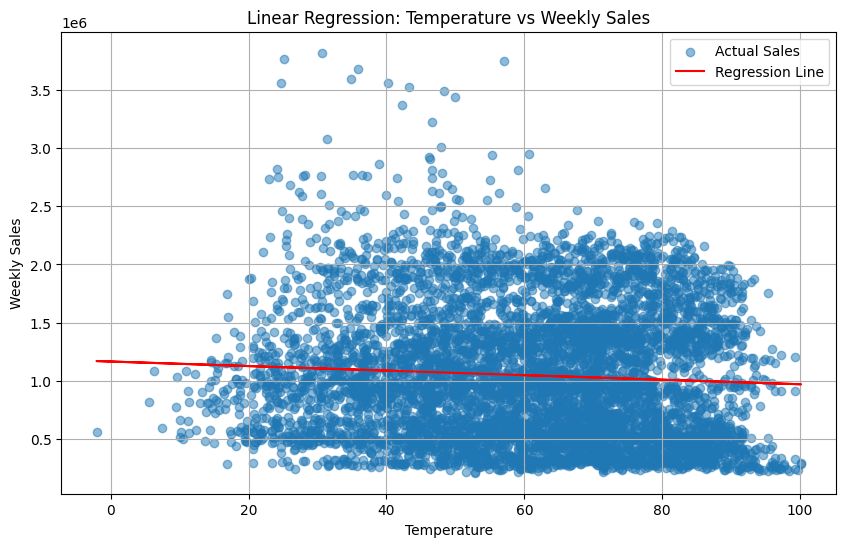

In [66]:
# Plot the regression line along with the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Weekly_Sales'], alpha=0.5, label='Actual Sales')
plt.plot(data['Temperature'], predicted_sales, color='red', label='Regression Line')
plt.title('Linear Regression: Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# Step 4: Print the regression coefficients
print("Linear Regression Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Slope (Temperature coefficient): {model.coef_[0]}")

Linear Regression Coefficients:
Intercept: 1165406.0127923777
Slope (Temperature coefficient): -1952.4192272081975


In [69]:
# Step 1: Check the correlation between Consumer Price Index (CPI) and Weekly Sales
cpi_correlation = data[['CPI', 'Weekly_Sales']].corr()
print("Correlation between CPI and Weekly Sales:")
print(cpi_correlation)

Correlation between CPI and Weekly Sales:
                   CPI  Weekly_Sales
CPI           1.000000     -0.072634
Weekly_Sales -0.072634      1.000000


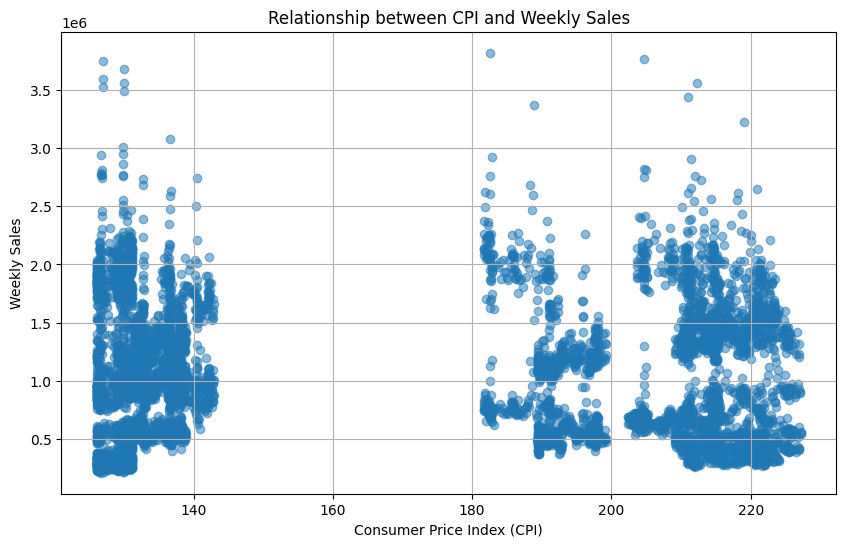

In [71]:
# Step 2: Scatter plot to visualize the relationship between CPI and Weekly Sales
plt.figure(figsize=(10, 6))
plt.scatter(data['CPI'], data['Weekly_Sales'], alpha=0.5)
plt.title('Relationship between CPI and Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [74]:
# Reshape CPI data for regression model
X_cpi = data['CPI'].values.reshape(-1, 1)
y_cpi = data['Weekly_Sales'].values
# Create a linear regression model
cpi_model = LinearRegression()
cpi_model.fit(X_cpi, y_cpi)

LinearRegression()

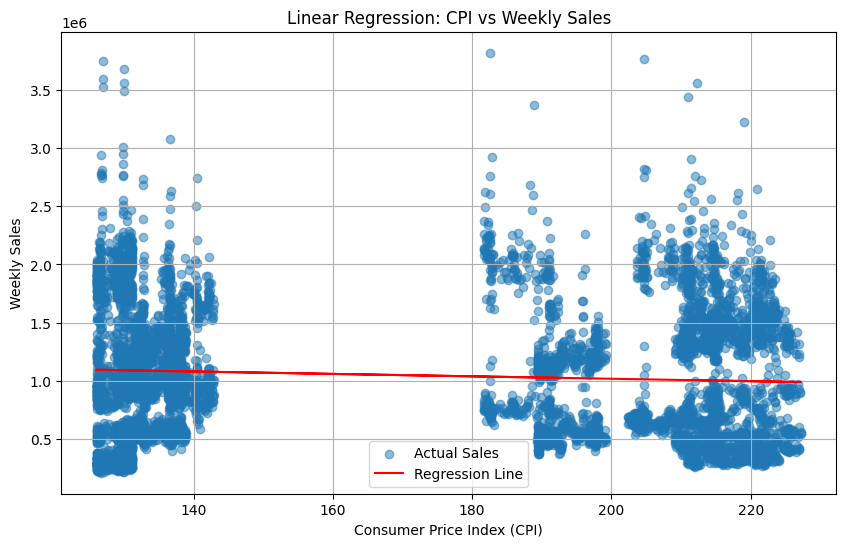

In [75]:
# Predict the weekly sales based on CPI
predicted_sales_cpi = cpi_model.predict(X_cpi)

# Plot the regression line along with the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['CPI'], data['Weekly_Sales'], alpha=0.5, label='Actual Sales')
plt.plot(data['CPI'], predicted_sales_cpi, color='red', label='Regression Line')
plt.title('Linear Regression: CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# Step 4: Print the regression coefficients
print("Linear Regression Coefficients:")
print(f"Intercept: {cpi_model.intercept_}")
print(f"Slope (CPI coefficient): {cpi_model.coef_[0]}")

Linear Regression Coefficients:
Intercept: 1225673.7181543761
Slope (CPI coefficient): -1041.557952513


In [79]:
# Step 1: Calculate total and average sales per store
store_sales = data.groupby('Store')['Weekly_Sales'].agg(['sum', 'mean', 'max', 'min']).reset_index()

# Step 2: Sort stores by total sales (descending order) to find the top performers
top_performing_stores = store_sales.sort_values(by='sum', ascending=False)

# Step 3: Display the top 5 performing stores by total sales
print("Top 5 Performing Stores by Total Sales:")
print(top_performing_stores.head())

Top 5 Performing Stores by Total Sales:
    Store           sum          mean         max         min
19     20  3.013978e+08  2.107677e+06  3766687.43  1761016.51
3       4  2.995440e+08  2.094713e+06  3676388.98  1762539.30
13     14  2.889999e+08  2.020978e+06  3818686.45  1479514.66
12     13  2.865177e+08  2.003620e+06  3595903.20  1633663.12
1       2  2.753824e+08  1.925751e+06  3436007.68  1650394.44


<ipython-input-82-e7141a11cb44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_performing_stores.head(10), x='Store', y='sum', palette='viridis')


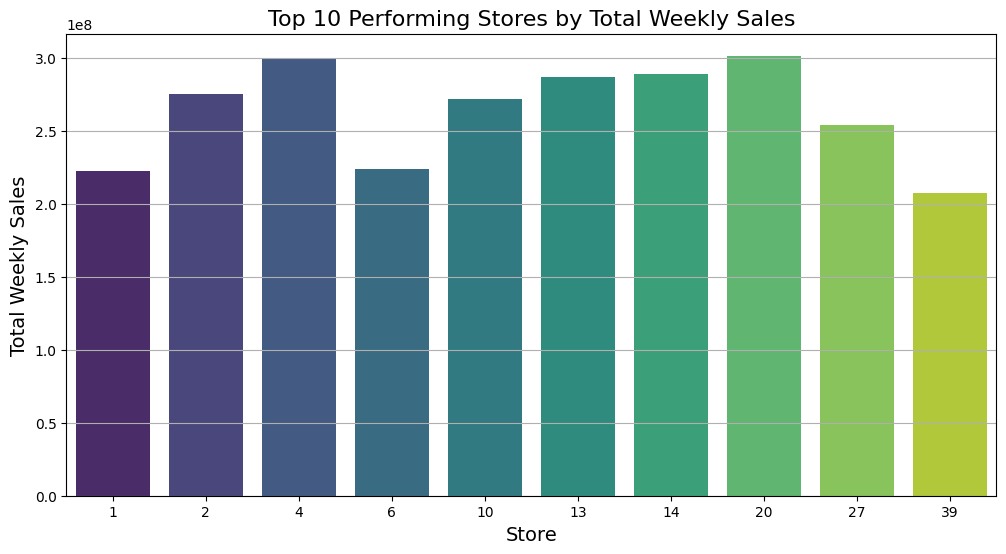

In [82]:
# Optional: Visualize the top 10 performing stores
plt.figure(figsize=(12, 6))
sns.barplot(data=top_performing_stores.head(10), x='Store', y='sum', palette='viridis')
plt.title('Top 10 Performing Stores by Total Weekly Sales', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.grid(axis='y')
plt.show()


In [88]:
# Add growth data to the store_sales dataframe
store_sales['Sales_Growth (%)'] = sales_growth

# Step 5: Sort stores by sales growth to identify top performers with maximum growth
top_growth_stores = store_sales.sort_values(by='Sales_Growth (%)', ascending=False)

# Display the top 5 stores with the highest sales growth
print("Top 5 Stores with Highest Sales Growth:")
print(top_growth_stores.head())

Top 5 Stores with Highest Sales Growth:
    Store           sum          mean         max         min  \
44     45  1.123953e+08  7.859814e+05  1682862.03   617207.58   
39     40  1.378703e+08  9.641280e+05  1648829.18   764014.75   
41     42  7.956575e+07  5.564039e+05   674919.45   428953.60   
17     18  1.551147e+08  1.084718e+06  2027507.15   540922.94   
38     39  2.074455e+08  1.450668e+06  2554482.84  1158698.44   

    Sales_Growth (%)  
44         28.452044  
39         27.539906  
41         21.169111  
17         19.571891  
38         16.400244  


In [92]:
# Step 1: Identify the worst performing store based on total sales
worst_performing_store = store_sales.sort_values(by='sum', ascending=True).head(1)

# Step 2: Identify the best performing store based on total sales
best_performing_store = store_sales.sort_values(by='sum', ascending=False).head(1)

# Step 3: Calculate the difference in total sales between the best and worst performing stores
sales_difference = best_performing_store['sum'].values[0] - worst_performing_store['sum'].values[0]

# Display the worst performing store
print("Worst Performing Store based on Total Sales:")
print(worst_performing_store)

# Display the best performing store
print("\nBest Performing Store based on Total Sales:")
print(best_performing_store)

# Display the difference between the best and worst performing stores
print(f"\nDifference in Total Sales between the Best and Worst Performing Stores: {sales_difference}")


Worst Performing Store based on Total Sales:
    Store          sum           mean        max        min  Sales_Growth (%)
32     33  37160221.96  259861.692028  331173.51  209986.25         12.170019

Best Performing Store based on Total Sales:
    Store           sum          mean         max         min  \
19     20  3.013978e+08  2.107677e+06  3766687.43  1761016.51   

    Sales_Growth (%)  
19        -12.305296  

Difference in Total Sales between the Best and Worst Performing Stores: 264237570.49999997


<ipython-input-94-e29c40ae5400>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Best Performing Store', 'Worst Performing Store'], y=[best_performing_store['sum'].values[0], worst_performing_store['sum'].values[0]], palette='coolwarm')


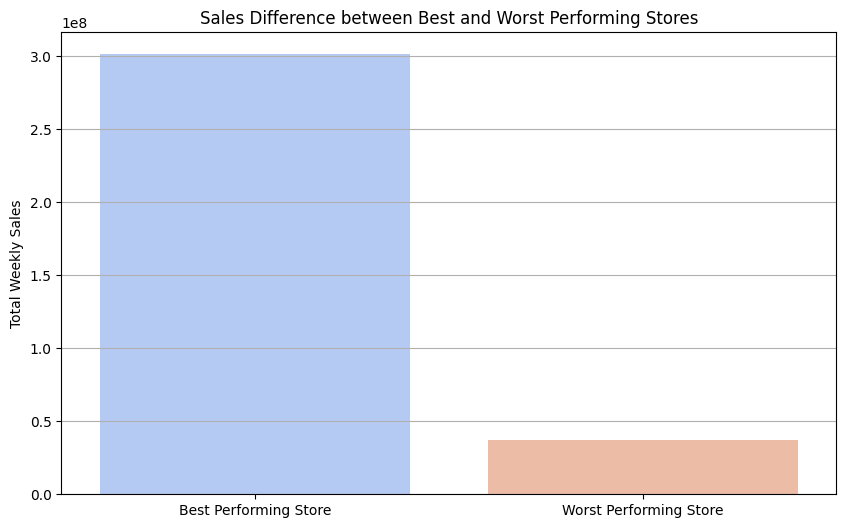

In [94]:
# Optional: Visualize the difference in sales between best and worst performing stores
plt.figure(figsize=(10, 6))
sns.barplot(x=['Best Performing Store', 'Worst Performing Store'], y=[best_performing_store['sum'].values[0], worst_performing_store['sum'].values[0]], palette='coolwarm')
plt.title('Sales Difference between Best and Worst Performing Stores')
plt.ylabel('Total Weekly Sales')
plt.grid(axis='y')
plt.show()

In [113]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
# Extracting time-based features (Week, Month, Year)
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
# Let's take the data for a single store (Store 1 in this case)
store_data = data[data['Store'] == 1]

# Features and target variable
X = store_data[['Week', 'Month', 'Year', 'Unemployment', 'Temperature', 'Fuel_Price', 'CPI']]
y = store_data['Weekly_Sales']

# Step 3: Train the regression model (Linear Regression)
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [116]:
# Let's assume that the last week in the dataset is the starting point for future prediction
last_week = store_data['Week'].max()
last_month = store_data['Month'].iloc[-1]
last_year = store_data['Year'].iloc[-1]

SyntaxError: incomplete input (<ipython-input-116-2a0f1ab1d734>, line 13)

In [119]:
# Create future weeks data for the next 12 weeks
future_weeks = pd.DataFrame({
    'Week': np.arange(last_week + 1, last_week + 13),  # Next 12 weeks
    'Month': [last_month] * 12,  # Same month for simplicity
    'Year': [last_year] * 12,  # Same year for simplicity
    'Unemployment': [store_data['Unemployment'].iloc[-1]] * 12,  # Same unemployment rate
    'Temperature': [store_data['Temperature'].iloc[-1]] * 12,  # Same temperature
    'Fuel_Price': [store_data['Fuel_Price'].iloc[-1]] * 12,  # Same fuel price
    'CPI': [store_data['CPI'].iloc[-1]] * 12  # Same CPI
})

In [120]:
# Predict the sales for the next 12 weeks
forecast_sales = model.predict(future_weeks)

In [123]:
# Step 5: Display the forecasted sales for the next 12 weeks
forecast_weeks = future_weeks[['Week', 'Month', 'Year']]
forecast_weeks['Predicted_Weekly_Sales'] = forecast_sales
print("Forecasted Sales for the Next 12 Weeks:")
print(forecast_weeks)


Forecasted Sales for the Next 12 Weeks:
    Week  Month  Year  Predicted_Weekly_Sales
0     53     10  2012            1.253668e+06
1     54     10  2012            1.218814e+06
2     55     10  2012            1.183961e+06
3     56     10  2012            1.149108e+06
4     57     10  2012            1.114255e+06
5     58     10  2012            1.079401e+06
6     59     10  2012            1.044548e+06
7     60     10  2012            1.009695e+06
8     61     10  2012            9.748415e+05
9     62     10  2012            9.399882e+05
10    63     10  2012            9.051350e+05
11    64     10  2012            8.702817e+05


<ipython-input-123-d524baef12dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_weeks['Predicted_Weekly_Sales'] = forecast_sales


<ipython-input-124-14b587cf23a3>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  forecast_dates = pd.to_datetime(forecast_weeks[['Year', 'Month', 'Week']].astype(str).agg('-'.join, axis=1))


DateParseError: day is out of range for month: 2012-10-53, at position 0

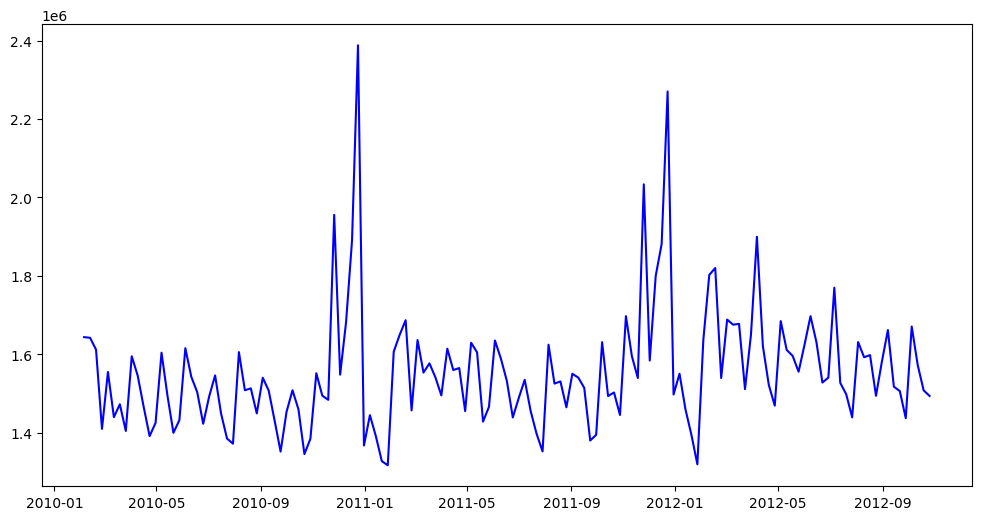

In [124]:
# Optional: Plotting the forecasted sales
plt.figure(figsize=(12, 6))

# Plot historical sales
plt.plot(store_data['Date'], store_data['Weekly_Sales'], label='Historical Sales', color='blue')

# Plot forecasted sales
forecast_dates = pd.to_datetime(forecast_weeks[['Year', 'Month', 'Week']].astype(str).agg('-'.join, axis=1))
plt.plot(forecast_dates, forecast_sales, label='Forecasted Sales', color='red', linestyle='--')

# Title and labels
plt.title('Sales Forecast for the Next 12 Weeks')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()